## Import Libraries

In [367]:
import torch
import torch.utils.data
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run utils.ipynb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

## Load model

In [368]:
boston_data = load_boston(return_X_y=False)

In [369]:
print("Model filename: " + boston_data.filename)

Model filename: C:\Users\Administrator\anaconda3\envs\omertorch\lib\site-packages\sklearn\datasets\data\boston_house_prices.csv


In [370]:
m = boston_data.data.shape[0]

In [371]:
X = boston_data.data
y = boston_data.target.reshape(m, -1)

In [372]:
print("Input shape is: " + str(X.shape))
print("Output shape is: " + str(y.shape))

Input shape is: (506, 13)
Output shape is: (506, 1)


## Split train-dev-test sets

In [373]:
random_seed = 43
X_train_and_dev, X_test, y_train_and_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_and_dev, y_train_and_dev, test_size=0.25, random_state=random_seed)

Convert to Pandas Data Frames:

In [374]:
X_train = pd.DataFrame(data=X_train, columns=boston_data.feature_names)
X_dev = pd.DataFrame(data=X_dev, columns=boston_data.feature_names)
X_test = pd.DataFrame(data=X_test, columns=boston_data.feature_names)
y_train = pd.DataFrame(data=y_train, columns=["House price"])
y_dev = pd.DataFrame(data=y_dev, columns=["House price"])
y_test = pd.DataFrame(data=y_test, columns=["House price"])

In [375]:
print("Train set size: " + str(X_train.shape))
print("Dev set size: \t" + str(X_dev.shape))
print("Test set size: \t" + str(X_test.shape))

Train set size: (303, 13)
Dev set size: 	(101, 13)
Test set size: 	(102, 13)


## Explore the data

In [376]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Explore the inputs (x)

In [377]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
1,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56
2,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
3,0.05083,0.0,5.19,0.0,0.515,6.316,38.1,6.4584,5.0,224.0,20.2,389.71,5.68
4,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42


In [378]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     303 non-null    float64
 1   ZN       303 non-null    float64
 2   INDUS    303 non-null    float64
 3   CHAS     303 non-null    float64
 4   NOX      303 non-null    float64
 5   RM       303 non-null    float64
 6   AGE      303 non-null    float64
 7   DIS      303 non-null    float64
 8   RAD      303 non-null    float64
 9   TAX      303 non-null    float64
 10  PTRATIO  303 non-null    float64
 11  B        303 non-null    float64
 12  LSTAT    303 non-null    float64
dtypes: float64(13)
memory usage: 30.9 KB


In [379]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,3.072186,11.490099,10.950660,0.062706,0.551323,6.267208,67.048845,3.844638,9.306931,403.584158,18.461716,356.533696,12.289142
std,6.896973,23.555941,6.692783,0.242835,0.113899,0.709557,28.687941,2.012930,8.622790,165.760255,2.163848,91.716498,6.896749
min,0.006320,0.000000,0.740000,0.000000,0.392000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.082100,0.000000,5.190000,0.000000,0.449000,5.883500,42.600000,2.177750,4.000000,278.000000,17.400000,376.420000,6.600000
50%,0.239120,0.000000,8.560000,0.000000,0.532000,6.195000,74.900000,3.377900,5.000000,330.000000,19.100000,391.340000,11.380000
75%,2.799060,12.500000,18.100000,0.000000,0.624000,6.586000,93.100000,5.166300,16.000000,666.000000,20.200000,396.290000,16.550000
max,73.534100,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,36.980000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

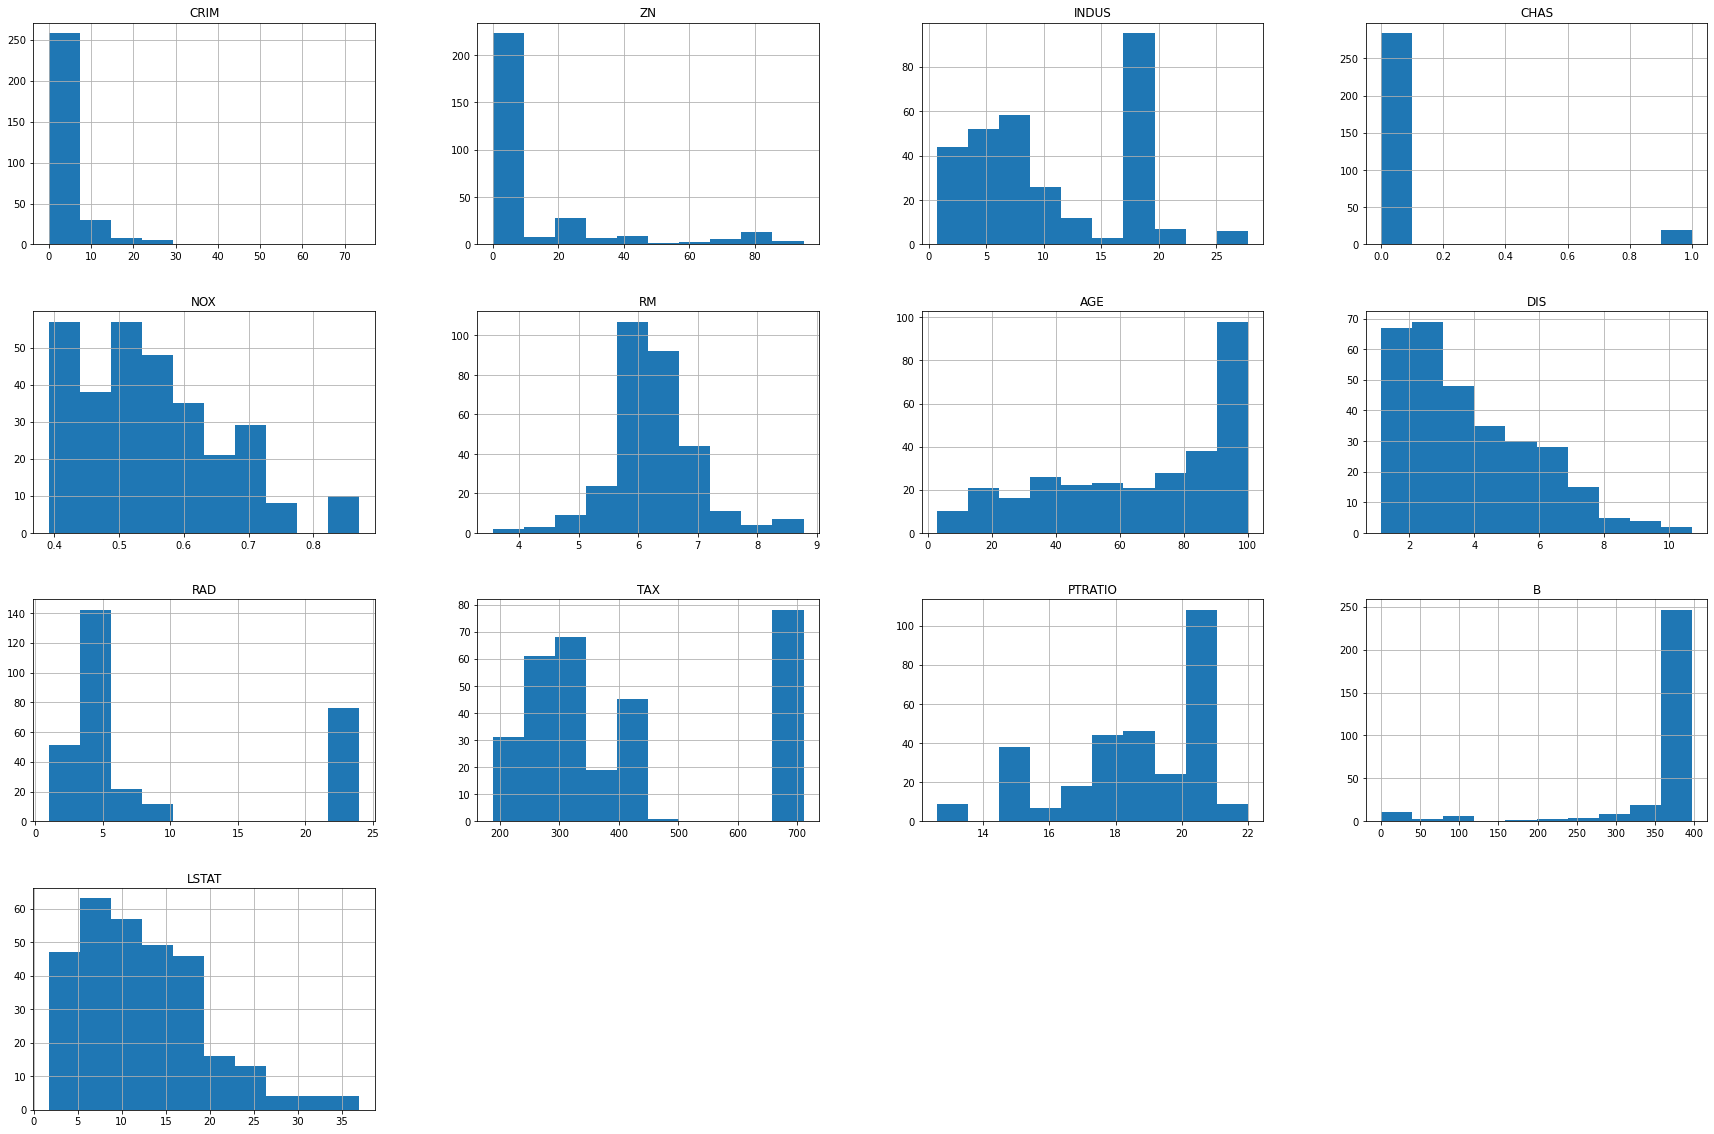

In [380]:
X_train.hist(bins=10, figsize=(30, 20))

In [381]:
X_train.corr().style.applymap(color_corr_matrix)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.212414,0.449062,-0.034846,0.446607,-0.309243,0.376747,-0.408939,0.665912,0.626940,0.297853,-0.463933,0.518590
ZN,-0.212414,1.000000,-0.516074,-0.045332,-0.504516,0.301689,-0.553938,0.630764,-0.308894,-0.270765,-0.372882,0.178996,-0.404214
INDUS,0.449062,-0.516074,1.000000,0.091698,0.758191,-0.412040,0.613818,-0.708063,0.613514,0.713620,0.344323,-0.382404,0.594021
CHAS,-0.034846,-0.045332,0.091698,1.000000,0.104140,0.069530,0.104604,-0.120124,0.017661,-0.001653,-0.079228,0.026864,-0.033283
NOX,0.446607,-0.504516,0.758191,0.104140,1.000000,-0.306793,0.713340,-0.762778,0.594326,0.640491,0.141355,-0.406418,0.552171
RM,-0.309243,0.301689,-0.412040,0.069530,-0.306793,1.000000,-0.262948,0.229522,-0.235003,-0.306396,-0.319445,0.185917,-0.632652
AGE,0.376747,-0.553938,0.613818,0.104604,0.713340,-0.262948,1.000000,-0.757411,0.415892,0.451448,0.207783,-0.263756,0.620996
DIS,-0.408939,0.630764,-0.708063,-0.120124,-0.762778,0.229522,-0.757411,1.000000,-0.485854,-0.505421,-0.202847,0.312360,-0.488621
RAD,0.665912,-0.308894,0.613514,0.017661,0.594326,-0.235003,0.415892,-0.485854,1.000000,0.920400,0.450174,-0.447469,0.483330
TAX,0.626940,-0.270765,0.713620,-0.001653,0.640491,-0.306396,0.451448,-0.505421,0.920400,1.000000,0.419282,-0.447742,0.527677


### Explore the labels (y)

In [382]:
y_train.head()

,House price
0,7.0
1,26.2
2,24.0
3,22.2
4,27.5


array([[<AxesSubplot:title={'center':'House price'}>]], dtype=object)

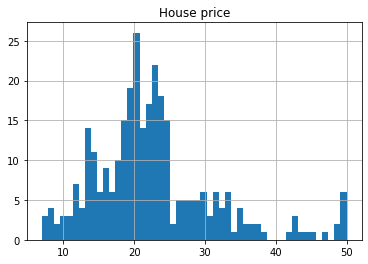

In [383]:
y_train.hist(bins=50)

## Training

### Define the models

In [384]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
        
        self.loss_function = torch.nn.MSELoss()
        self.training_loss = []
        self.validation_loss = []
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
    def reset_loss_values(self):
        self.training_loss = []
        self.validation_loss = []

In [409]:
class deepNetworkRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(deepNetworkRegression, self).__init__()
        # Hardcoded network architecture
        self.hidden_layer1 = torch.nn.Linear(inputSize, 100)
        self.hidden_layer2 = torch.nn.Linear(100, 100)
        self.hidden_layer3 = torch.nn.Linear(100, 100)
        self.hidden_layer4 = torch.nn.Linear(100, 50)
        self.output_layer = torch.nn.Linear(50, outputSize)
        
        self.loss_function = torch.nn.MSELoss()
        self.training_loss = []
        self.validation_loss = []
        
    def forward(self, x):
        x = F.relu(self.hidden_layer1(x))
        x = F.relu(self.hidden_layer2(x))
        x = F.relu(self.hidden_layer3(x))
        x = F.relu(self.hidden_layer4(x))
        out = self.output_layer(x)
        return out
    
    def reset_loss_values(self):
        self.training_loss = []
        self.validation_loss = []

In [410]:
class Data(torch.utils.data.Dataset):
    def __init__(self, x, y):
        super(Data, self).__init__()
        
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        
        self.x = torch.as_tensor(x.values, dtype=torch.float, device=device)
        self.y = torch.as_tensor(y.values, dtype=torch.float, device=device)
        
    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [411]:
# Define all train, dev and test sets
train_dataset = Data(X_train, y_train)
dev_dataset = Data(X_dev, y_dev)
test_dataset = Data(X_test, y_test)

### Training procedure

Define a training pipeline:

In [412]:
def train_model(train_dataset,
                dev_dataset,
                model,
                defined_optimizer,
                loss_function,
                epochs,
                lr,
                print_loss_values=False,
                print_loss_graph=False):
    
    
    if defined_optimizer == "sgd" or defined_optimizer == "SGD":
        optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)
    elif defined_optimizer == "Adam" or defined_optimizer == "adam":
        optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)
    elif defined_optimizer == "Adagrad" or defined_optimizer == "adagrad":
        optimizer = torch.optim.Adagrad(params=model.parameters(), lr=lr, weight_decay=1e-4)
    
    X_train_torch = train_dataset.x
    y_train_torch = train_dataset.y
    X_dev_torch = dev_dataset.x
    y_dev_torch = dev_dataset.y
    
    for epoch in range(epochs):
        
        # Training Part - Start
        
        model.train()
    
        optimizer.zero_grad()

        train_outputs = model(X_train_torch)

        train_loss = loss_function(train_outputs, y_train_torch)

        train_loss.backward()

        optimizer.step()

        if print_loss_values:
            print("In epoch {}, loss: {}".format(epoch, train_loss.item()))

        model.training_loss.append(train_loss.item())
        
        # Training Part - End
        
        # Evaluation Part - Start
        
        model.eval()
        
        dev_outputs = model(X_dev_torch)
        
        dev_loss = loss_function(dev_outputs, y_dev_torch)
        
        model.validation_loss.append(dev_loss.item())
        
        # Evaluation Part - End
        
    if print_loss_graph:
        plot_loss(train_loss=model.training_loss, dev_loss=model.validation_loss)

### Train the linear regression models

In [413]:
epochs = 3000

In [414]:
linear_model_sgd = linearRegression(inputSize=X_train.shape[1], outputSize=y_train.shape[1])
linear_model_adagrad = linearRegression(inputSize=X_train.shape[1], outputSize=y_train.shape[1])
linear_model_adam = linearRegression(inputSize=X_train.shape[1], outputSize=y_train.shape[1])

learning_rate_linear = 0.01

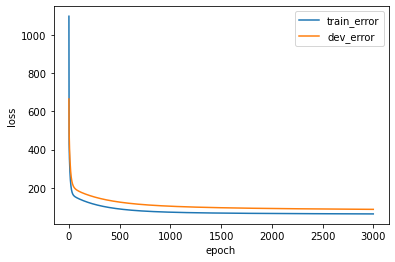

In [415]:
# train the SGD model
train_model(train_dataset=train_dataset, 
            dev_dataset=dev_dataset,
            model=linear_model_sgd,
            defined_optimizer="sgd",
            loss_function=linear_model_sgd.loss_function,
            epochs=epochs,
            lr=learning_rate_linear * 0.0001, # Work with smaller LR
            print_loss_values=False,
            print_loss_graph=True)

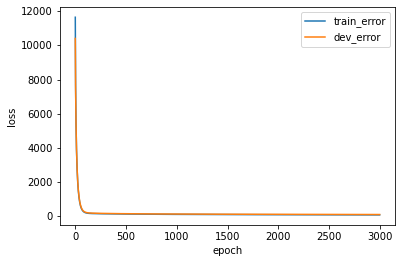

In [416]:
# train the Adagrad model
train_model(train_dataset=train_dataset, 
            dev_dataset=dev_dataset,
            model=linear_model_adagrad,
            defined_optimizer="adagrad",
            loss_function=linear_model_adagrad.loss_function,
            epochs=epochs,
            lr=learning_rate_linear,
            print_loss_values=False,
            print_loss_graph=True)

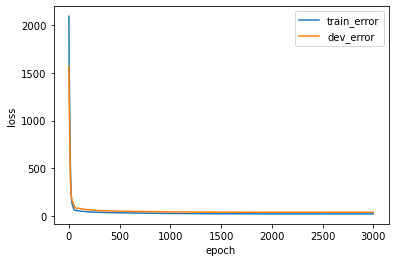

In [417]:
# train the Adam model
train_model(train_dataset=train_dataset, 
            dev_dataset=dev_dataset,
            model=linear_model_adam,
            defined_optimizer="adam",
            loss_function=linear_model_adam.loss_function,
            epochs=epochs,
            lr=learning_rate_linear,
            print_loss_values=False,
            print_loss_graph=True)

### Train the deep network model

In [423]:
nn_model_sgd = deepNetworkRegression(inputSize=X_train.shape[1], outputSize=y_train.shape[1])
nn_model_adagrad = deepNetworkRegression(inputSize=X_train.shape[1], outputSize=y_train.shape[1])
nn_model_adam = deepNetworkRegression(inputSize=X_train.shape[1], outputSize=y_train.shape[1])

learning_rate_nn = 5e-5

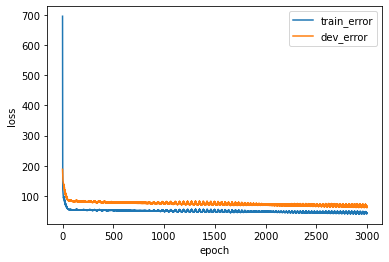

In [424]:
train_model(train_dataset=train_dataset, 
            dev_dataset=dev_dataset, 
            model=nn_model_sgd,
            defined_optimizer="sgd", 
            loss_function=nn_model_sgd.loss_function, 
            epochs=epochs, 
            lr=learning_rate_nn, 
            print_loss_values=False, 
            print_loss_graph=True)

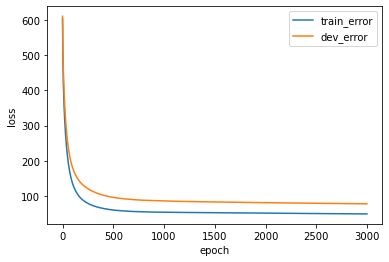

In [425]:
train_model(train_dataset=train_dataset, 
            dev_dataset=dev_dataset, 
            model=nn_model_adagrad,
            defined_optimizer="adagrad", 
            loss_function=nn_model_adagrad.loss_function, 
            epochs=epochs, 
            lr=learning_rate_nn * 5, 
            print_loss_values=False, 
            print_loss_graph=True)

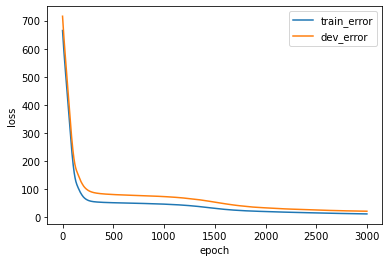

In [426]:
train_model(train_dataset=train_dataset, 
            dev_dataset=dev_dataset, 
            model=nn_model_adam,
            defined_optimizer="adam", 
            loss_function=nn_model_adam.loss_function, 
            epochs=epochs, 
            lr=learning_rate_nn, 
            print_loss_values=False, 
            print_loss_graph=True)

#### Check the results

In [408]:
# Two deep layers
print("linear GD loss:\t\t\t" + str(linear_model_sgd.validation_loss[-1]))
print("linear Adagrad loss:\t\t" + str(linear_model_adagrad.validation_loss[-1]))
print("linear Adam loss:\t\t" + str(linear_model_adam.validation_loss[-1]))
print("Deep NN GD loss:\t\t" + str(nn_model_sgd.validation_loss[-1]))
print("Deep NN Adagrad loss:\t\t" + str(nn_model_adagrad.validation_loss[-1]))
print("Deep NN Adam loss:\t\t" + str(nn_model_adam.validation_loss[-1]))

linear GD loss:			85.30171966552734
linear Adagrad loss:		77.1449203491211
linear Adam loss:		38.37805938720703
Deep NN GD loss:		66.35966491699219
Deep NN Adagrad loss:		246.73757934570312
Deep NN Adam loss:		74.6198501586914


In [422]:
# Four deep layers
print("linear GD loss:\t\t\t" + str(linear_model_sgd.validation_loss[-1]))
print("linear Adagrad loss:\t\t" + str(linear_model_adagrad.validation_loss[-1]))
print("linear Adam loss:\t\t" + str(linear_model_adam.validation_loss[-1]))
print("Deep NN GD loss:\t\t" + str(nn_model_sgd.validation_loss[-1]))
print("Deep NN Adagrad loss:\t\t" + str(nn_model_adagrad.validation_loss[-1]))
print("Deep NN Adam loss:\t\t" + str(nn_model_adam.validation_loss[-1]))

linear GD loss:			86.94798278808594
linear Adagrad loss:		106.36994934082031
linear Adam loss:		38.37186813354492
Deep NN GD loss:		70.68522644042969
Deep NN Adagrad loss:		586.44091796875
Deep NN Adam loss:		77.37437438964844


In [428]:
# Two deep layers, bigger LR for the NN (*5 for sgd and adam, *25 for adagrad)
print("linear GD loss:\t\t\t" + str(linear_model_sgd.validation_loss[-1]))
print("linear Adagrad loss:\t\t" + str(linear_model_adagrad.validation_loss[-1]))
print("linear Adam loss:\t\t" + str(linear_model_adam.validation_loss[-1]))
print("Deep NN GD loss:\t\t" + str(nn_model_sgd.validation_loss[-1]))
print("Deep NN Adagrad loss:\t\t" + str(nn_model_adagrad.validation_loss[-1]))
print("Deep NN Adam loss:\t\t" + str(nn_model_adam.validation_loss[-1]))

linear GD loss:			86.94798278808594
linear Adagrad loss:		106.36994934082031
linear Adam loss:		38.37186813354492
Deep NN GD loss:		61.48246383666992
Deep NN Adagrad loss:		78.17229461669922
Deep NN Adam loss:		22.3032169342041
